# Análise de Salários de Cientistas de Dados em 2024

## Fonte de Dados
Para este projeto, utilizamos o arquivo de dados `salaries.csv`, que contém informações detalhadas sobre os salários de cientistas de dados e outras profissões relacionadas ao setor de tecnologia para o ano de 2024.
Site: https://aijobs.net/salaries/download/

## Objetivo do Projeto
O principal objetivo deste projeto é analisar o conjunto de dados fornecido para extrair insights valiosos sobre os salários de cientistas de dados. A análise inclui uma comparação com outras áreas dentro do setor de tecnologia, considerando diferentes variáveis como o nível de experiência, tipo de emprego, localização e outras métricas relevantes. A meta é identificar padrões e tendências que possam ser úteis para empregadores, profissionais e outros interessados no mercado de trabalho de ciência de dados.

## Ferramentas Utilizadas
Para realizar as análises, utilizamos a linguagem de programação **Python**, amplamente reconhecida por suas bibliotecas poderosas e versatilidade em manipulação e visualização de dados. Python é uma escolha ideal para análises exploratórias e para a preparação de dados para modelos de aprendizado de máquina.

## Descrição dos Dados
O conjunto de dados contém as seguintes colunas, com suas respectivas descrições:

| Coluna                     | Descrição                                                                                                                                                      |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **ano_de_trabalho**            | O ano em que o salário foi pago.                                                                                                                               |
| **nivel_experiencia**          | O nível de experiência no trabalho durante o ano: Júnior (EN), Intermediário (MI), Sênior (SE) e Diretor (EX).                                                                                                              |
| **tipo_emprego**               | O tipo de emprego para a função: Tempo parcial (PT), Tempo total (FT), Contrato (TC) e Freelance (FL).                                                                                                                              |
| **cargo**                      | A função exercida durante o ano.                                                                                                                           |
| **salario**                    | O valor total do salário bruto pago.                                                                                                                           |
| **salario_moeda**              | A moeda do salário pago, usando o código de moeda ISO 4217.                                                                                                         |
| **salario_em_usd**             | O salário convertido para USD (utilizando a taxa de câmbio média do respectivo ano), baseado em dados estatísticos do BIS e dos bancos centrais.                |
| **residencia_do_funcionario**  | País de residência principal do funcionário durante o ano de trabalho, como um código de país ISO 3166.                                                         |
| **proporcional_remoto**        | A proporção total de trabalho realizado remotamente.                                                                                                              |
| **localizacao_empresa**        | O país da sede do empregador ou da filial contratante, como um código de país ISO 3166.                                                                             |
| **tamanho_empresa**            | O número médio de funcionários que trabalharam para a empresa durante o ano.                                                                                         |

## Metodologia
A metodologia para este projeto segue os seguintes passos principais:

1. **Planejamento**: Definir o escopo da análise e os resultados desejados, garantindo que as perguntas de negócios sejam respondidas de maneira eficaz.
   
2. **Exploração e Preparação de Dados**: Utilização de técnicas de Análise Exploratória de Dados (EDA) para entender melhor as características dos dados, identificar valores ausentes e detectar possíveis outliers ou eventos anômalos. Esta etapa envolve a utilização de gráficos e estatísticas descritivas para resumir e visualizar as variáveis.

3. **Análise Detalhada**: Realização de análises comparativas entre diferentes variáveis, como níveis de experiência e tipos de emprego, para identificar tendências salariais e padrões de mercado.

4. **Visualização de Dados**: Criação de visualizações interativas e informativas para comunicar os insights encontrados de maneira clara e concisa aos usuários de negócios e outros stakeholders.

5. **Conclusões e Recomendações**: Com base nas análises, fornecer recomendações estratégicas que possam apoiar decisões de negócios, como estratégias de remuneração, políticas de trabalho remoto, entre outras.

## Ferramentas de Análise
A análise foi realizada utilizando **Jupyter Notebooks** hospedados na plataforma de **Kaggle**. As bibliotecas Python como **pandas**, **numpy**, **matplotlib** e **seaborn** foram essenciais para a manipulação de dados e criação de visualizações.

---

Com esta análise, esperamos oferecer uma visão abrangente e detalhada sobre o mercado de trabalho para cientistas de dados em 2024, ajudando tanto empresas quanto profissionais a entenderem melhor as dinâmicas e oportunidades presentes neste campo em crescimento.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from wordcloud import WordCloud,STOPWORDS

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
from matplotlib.colors import ListedColormap
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

colors = ["#b1e7cd","#854442","#000000","#fff4e6","#3c2f2f",
           "#be9b7b ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

In [7]:
# Carregando o arquivo CSV para visualização inicial
dados = pd.read_csv('salaries.csv')
dados.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Machine Learning Engineer,204600,USD,204600,US,0,US,M
1,2024,SE,FT,Machine Learning Engineer,84500,USD,84500,US,0,US,M
2,2024,SE,FT,Data Architect,370300,USD,370300,US,0,US,M


## Exploração e Preparação de Dados

In [8]:
# Renomeando as colunas para português
dados = dados.rename(columns={
    'work_year': 'ano_trabalho',
    'experience_level': 'nivel_experiencia',
    'employment_type': 'tipo_emprego',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda_salario',
    'salary_in_usd': 'salario_em_usd',
    'employee_residence': 'residencia_funcionario',
    'remote_ratio': 'percentual_remoto',
    'company_location': 'localizacao_empresa',
    'company_size': 'tamanho_empresa'
})

dados


,ano_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia_funcionario,percentual_remoto,localizacao_empresa,tamanho_empresa
0,2024,SE,FT,Machine Learning Engineer,204600,USD,204600,US,0,US,M
1,2024,SE,FT,Machine Learning Engineer,84500,USD,84500,US,0,US,M
2,2024,SE,FT,Data Architect,370300,USD,370300,US,0,US,M
3,2024,SE,FT,Data Architect,142600,USD,142600,US,0,US,M
4,2024,MI,FT,BI Developer,90000,USD,90000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
40651,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
40652,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
40653,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
40654,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [9]:
# Substituindo os valores na coluna 'nivel_experiencia'
dados['nivel_experiencia'] = dados['nivel_experiencia'].replace({
    'EN': 'Junior',
    'MI': 'Intermediário',
    'SE': 'Sênior',
    'EX': 'Diretor'
})

In [10]:
# Excluindo as colunas indesejadas
dados = dados.drop(columns=['residencia_funcionario', 'tamanho_empresa', 'salario_em_usd', 'localizacao_empresa'])

# Filtrando para manter apenas registros com ano_trabalho igual a 2024
dados = dados[dados['ano_trabalho'] == 2024]

In [11]:
# Mostrando as primeiras linhas do dataset para entender a estrutura
dados.head()
dados.info()
dados.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 30183 entries, 0 to 30199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano_trabalho       30183 non-null  int64 
 1   nivel_experiencia  30183 non-null  object
 2   tipo_emprego       30183 non-null  object
 3   cargo              30183 non-null  object
 4   salario            30183 non-null  int64 
 5   moeda_salario      30183 non-null  object
 6   percentual_remoto  30183 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.8+ MB


,ano_trabalho,salario,percentual_remoto
count,30183.0,3.018300e+04,30183.000000
mean,2024.0,1.655913e+05,17.796442
std,0.0,9.299085e+04,38.215331
min,2024.0,1.440000e+04,0.000000
25%,2024.0,1.120000e+05,0.000000
50%,2024.0,1.530000e+05,0.000000
75%,2024.0,2.050000e+05,0.000000
max,2024.0,6.500000e+06,100.000000


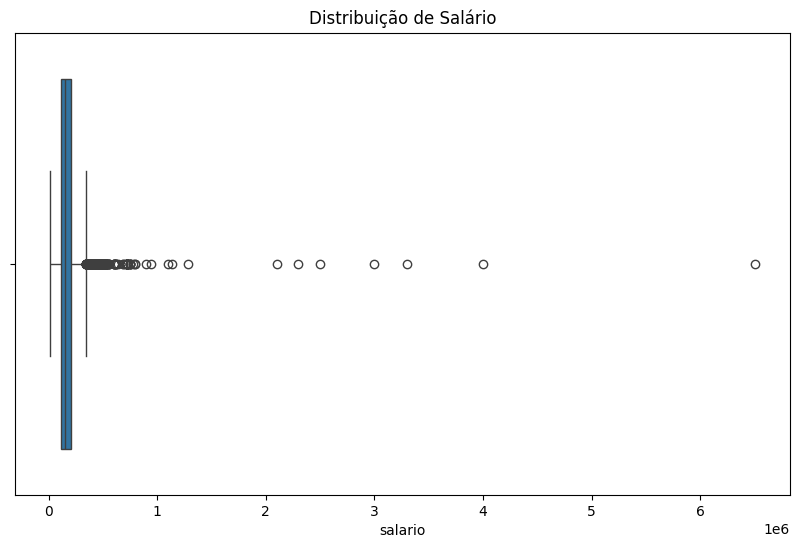

Registros removidos após a exclusão de nulos: 0
Novas dimensões dos dados após a limpeza: (29500, 7)


In [13]:
# Visualizando a distribuição de 'salario_em_usd' para identificar possíveis outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['salario'])
plt.title('Distribuição de Salário')
plt.show()

# Definindo um limite para considerar valores como outliers
Q1 = dados['salario'].quantile(0.25)
Q3 = dados['salario'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os dados para remover outliers
dados_filtrados = dados[(dados['salario'] >= limite_inferior) & (dados['salario'] <= limite_superior)]

# Excluindo dados faltantes e nulos
dados_limpos = dados_filtrados.dropna()

# Mostrando quantos registros foram removidos após a remoção de nulos
registros_removidos_nulos = dados_filtrados.shape[0] - dados_limpos.shape[0]
print(f'Registros removidos após a exclusão de nulos: {registros_removidos_nulos}')
print(f'Novas dimensões dos dados após a limpeza: {dados_limpos.shape}')

## Análise Detalhada

In [12]:
# Descobrindo quais são os 10 maiores salários do DataSet
top_10 = dados.groupby('cargo')['salario'].mean().nlargest(10).reset_index()
top_10


,cargo,salario
0,Data Scientist Lead,6500000.0
1,Lead Data Analyst,3300000.0
2,Manager Data Management,3000000.0
3,AI Software Development Engineer,2100000.0
4,AI Data Scientist,1280000.0
5,Big Data Engineer,1158800.0
6,Lead AI Engineer,940000.0
7,Head of Machine Learning,334000.0
8,Applied AI ML Lead,292500.0
9,Director of Machine Learning,284450.0


In [16]:
# Agrupando os dados por 'tipo_emprego' e 'ano_trabalho' e aplicando funções diferentes
dados_agrupados = dados_limpos.groupby(['cargo', 'ano_trabalho']).agg({
    'salario': 'mean',
    'percentual_remoto': 'mean',
    'nivel_experiencia': 'first',
    'tipo_emprego': 'first',
    'moeda_salario': 'first'
}).reset_index()

dados_agrupados

,cargo,ano_trabalho,salario,percentual_remoto,nivel_experiencia,tipo_emprego,moeda_salario
0,AI Architect,2024,202961.931034,22.413793,Sênior,FT,USD
1,AI Data Scientist,2024,60000.000000,100.000000,Junior,FT,USD
2,AI Developer,2024,184439.128205,6.410256,Intermediário,FT,USD
3,AI Engineer,2024,157695.309859,21.830986,Intermediário,FT,USD
4,AI Engineering Manager,2024,82000.000000,50.000000,Sênior,FT,EUR
...,...,...,...,...,...,...,...
179,Statistical Programmer,2024,146635.500000,0.000000,Intermediário,FT,USD
180,Statistician,2024,78000.000000,100.000000,Intermediário,FT,USD
181,Systems Engineer,2024,161090.038462,11.538462,Sênior,FT,USD
182,Technical Lead,2024,188076.923077,0.000000,Sênior,FT,USD


In [17]:
# Filtrando para manter apenas Data Scientists e o ano de 2024
ds_2024 = dados[(dados['cargo'] == 'Data Scientist') & (dados['ano_trabalho'] == 2024)]

# Calcular o salário médio para 2024
salario_medio_2024 = ds_2024['salario'].mean()

# Exibir o salário médio
print(f"O salário médio de Data Scientists em 2024 é: {salario_medio_2024:.2f}")


O salário médio de Data Scientists em 2024 é: 164674.68


In [19]:
# Filtrando apenas os cargos de nível Junior
dados_junior = dados[dados['nivel_experiencia'].str.contains('Junior', case=False, na=False)]

# Agrupar por título de trabalho e calcular a média salarial, pegando os 10 maiores salários
top_10_junior = dados_junior.groupby('cargo')['salario'].mean().nlargest(10).reset_index()
top_10_junior

,cargo,salario
0,AI Data Scientist,1.280000e+06
1,AI Software Engineer,8.000000e+05
2,AI Researcher,3.000000e+05
3,Research Scientist,2.024070e+05
4,Platform Engineer,1.845000e+05
5,Machine Learning Model Engineer,1.800000e+05
6,Machine Learning Scientist,1.792812e+05
7,Data Analytics Lead,1.653500e+05
8,Machine Learning Engineer,1.568023e+05
9,Research Engineer,1.559887e+05


In [20]:
# Analisando a distribuição de salários de "Data Scientist" por nível de experiência

# Filtrando dados para "Data Scientist"
data_scientist_salario = dados[dados['cargo'] == 'Data Scientist']

# Calculando o salário médio por ano e por nível de experiência
salario_experiencia = data_scientist_salario.groupby(['ano_trabalho', 'nivel_experiencia'])['salario'].mean().reset_index()
salario_experiencia


,ano_trabalho,nivel_experiencia,salario
0,2024,Diretor,209074.747573
1,2024,Intermediário,147340.002130
2,2024,Junior,110681.261411
3,2024,Sênior,177792.670080


In [21]:
# Adicionando um mapeamento para os tipos de trabalho
tipo_trabalho_map = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

# Adicionar uma nova coluna com o tipo de trabalho utilizando .loc para evitar o erro
data_scientist_salario.loc[:, 'cargo'] = data_scientist_salario['percentual_remoto'].map(tipo_trabalho_map)

# Calcular o salário médio por ano e tipo de trabalho
salary_by_work_type = data_scientist_salario.groupby(['ano_trabalho', 'cargo'])['salario'].mean().reset_index()

salary_by_work_type


,ano_trabalho,cargo,salario
0,2024,Híbrido,111256.250000
1,2024,Presencial,164872.112413
2,2024,Remoto,164175.715556


## Visualização de Dados

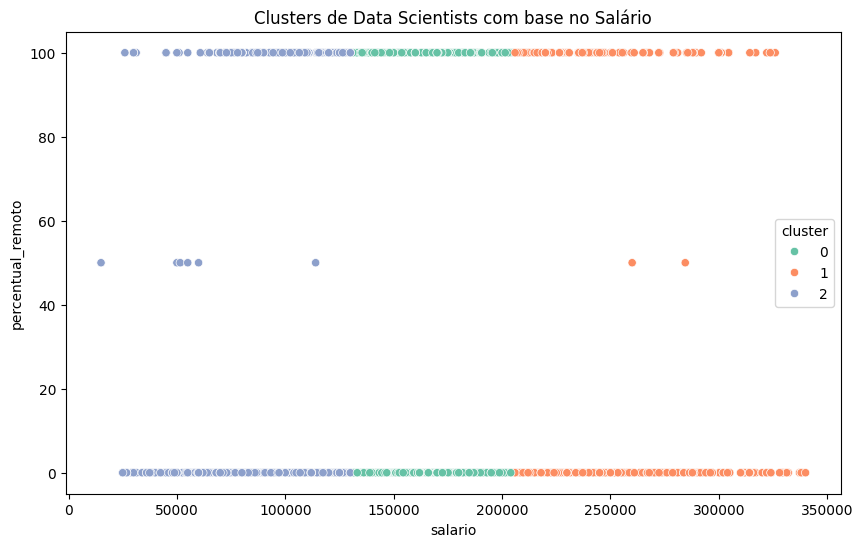

In [23]:
# K-Means Clustering
# Identificando grupos de Data Scientists com salários semelhantes, utilizando a técnica de K-Means.
from sklearn.cluster import KMeans

# Filtrando para manter apenas Data Scientists
dados_data_scientist = dados_limpos[dados_limpos['cargo'] == 'Data Scientist']

# Selecionando apenas a coluna de interesse para o clustering
X = dados_data_scientist[['salario']]

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
dados_data_scientist['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='salario', y='percentual_remoto', hue='cluster', data=dados_data_scientist, palette='Set2')
plt.title('Clusters de Data Scientists com base no Salário')
plt.show()


> Os Data Scientists foram agrupados em 3 clusters com base no salário. A visualização mostra que existem diferentes faixas salariais, possivelmente relacionadas à experiência, localidade ou tipo de emprego.


In [24]:
# Inferência Estatística
#Objetivo: Verificar se há diferença significativa nos salários médios de Data Scientists que trabalham remotamente 100% do tempo e os que trabalham menos remotamente.
from scipy.stats import ttest_ind

# Dividindo os dados em dois grupos: 100% remoto e menos de 100% remoto
remoto_total = dados_data_scientist[dados_data_scientist['percentual_remoto'] == 100]['salario']
remoto_parcial = dados_data_scientist[dados_data_scientist['percentual_remoto'] < 100]['salario']

# Realizar o teste t de Student
t_stat, p_value = ttest_ind(remoto_total, remoto_parcial)

print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_value}')



Estatística t: -1.4645868197241458
Valor p: 0.14309307025827678


> Sendo o valor p superior à 0,05 não há evidência suficiente para afirmar uma diferença.

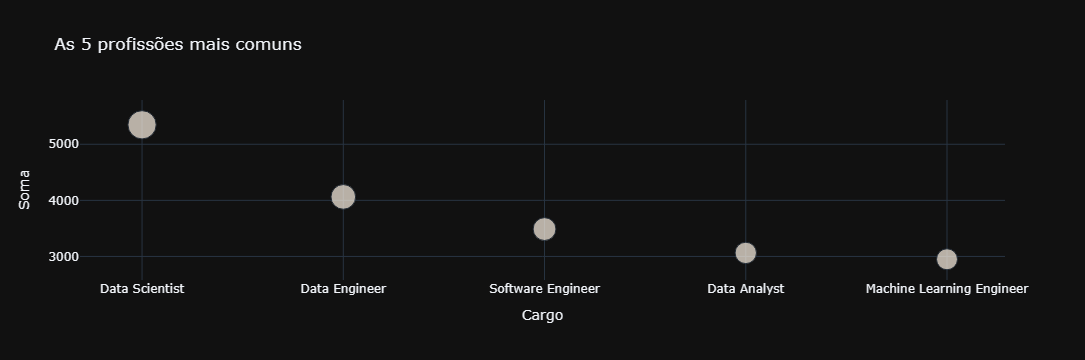

In [34]:
# Descobrindo as cinco profissões mais comuns
soma_top_5 = dados['cargo'].value_counts()[:5]

# Sccatter plot 
fig = px.scatter(x= soma_top_5.index,
                 y= soma_top_5.values,
                 title= 'As 5 profissões mais comuns',
                 color_discrete_sequence=[colors[3]],
                 size= soma_top_5,
                 labels= {'x' : 'Cargo','y':'Soma'},
                 template='plotly_dark')

fig.show()

> Com esse gráfico podemos observar que as 5 profissões mais comuns na área são: Data Scientist, Data Engineeer, Software Engineer, Data Analyst e Machine Learning Engineer. Sendo a mais frequente Data Scientist, como uma variação de mais de 2000 da soma em relação à Machine Learning, por exemplo.

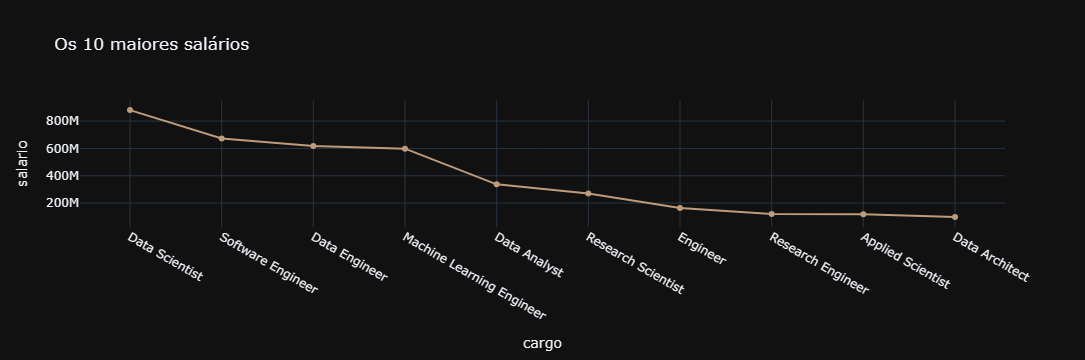

In [37]:
# Comparando as dez maiores salários por profissão
top_10_salario = dados.groupby('cargo')['salario'].sum().sort_values(ascending=False).head(10)

dados_top_10 = top_10_salario.reset_index(name='salario')

fig = px.line(dados_top_10,
              x='cargo',
              y='salario',
              title='Os 10 maiores salários',
              color_discrete_sequence=[colors[5]],
              markers=True,
              template='plotly_dark')

fig.show()

> Vale destacar a diferença de salário entre Data Scientist e Data Architect de mais de 600M, e até mesmo uma variação com o segundo lugar (Software Engineer) com mais de 100M.

Linear_Regression:
Mean Squared Error: 783232.2279118103
R^2 Score: 0.3280831147940403
------------------------------
KNN:
Mean Squared Error: 843993.9560145766
R^2 Score: 0.2759570280069945
------------------------------
DecisionTree:
Mean Squared Error: 775520.2009204231
R^2 Score: 0.33469908508996715
------------------------------
RandomForest:
Mean Squared Error: 771160.5814638847
R^2 Score: 0.33843910219029816
------------------------------
XGB:
Mean Squared Error: 769209.7466686404
R^2 Score: 0.3401126784202584
------------------------------
SVR:
Mean Squared Error: 1165717.0048868386
R^2 Score: -4.176416930912197e-05
------------------------------


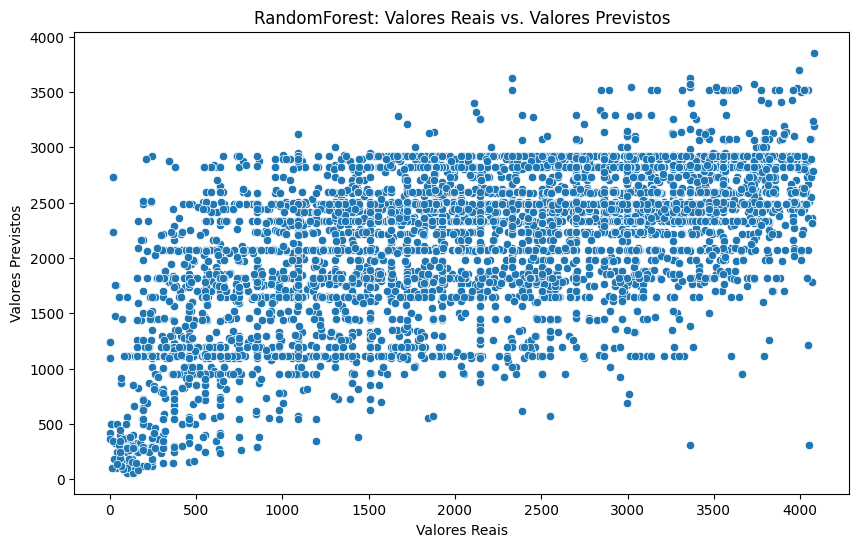

In [38]:
# Criando o modelo
# Separando as features (X) e o target (y)
X = dados.drop(columns=['salario'])
y = dados['salario']

# Aplicando One-Hot Encoding nas colunas categóricas
categorical_features = X.select_dtypes(include=['object']).columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = ct.fit_transform(X)

# "Encodando" a variável target se necessário 
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Escalonando dos dados com ajuste para matrizes esparsas
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos de Regressão
models = {
    'Linear_Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=10),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'XGB': XGBRegressor(),
    'SVR': SVR()  # Substitui SVC por SVR para regressão
}

# Treinando e Avaliando os Modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliando os modelos de regressão
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('-' * 30)

# Visualizando os resultados para um dos modelos (RandomForest)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plotando a relação entre valores reais e previstos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('RandomForest: Valores Reais vs. Valores Previstos')
plt.show()


> **Desempenho Geral dos Modelos**:
Os modelos de regressão tiveram um desempenho moderado, com valores de R² variando de aproximadamente 0.28 a 0.34 para a maioria dos modelos.
O modelo XGBoost (XGB) apresentou o melhor desempenho, com o menor erro quadrático médio (MSE) e o maior valor de R², indicando que ele consegue explicar cerca de 34% da variância dos salários.
O modelo Support Vector Regression (SVR) teve o pior desempenho, com um R² muito próximo de zero, indicando que ele praticamente não consegue explicar a variância dos salários.

> *Interpretação do R²*:
O R² é uma métrica que indica a proporção da variância da variável dependente (salário) que é explicada pelas variáveis independentes no modelo.
Um R² em torno de 0.34 sugere que os modelos estão capturando parte da relação entre as variáveis preditoras e o salário, mas ainda há muito espaço para melhoria, pois uma grande parte da variação nos salários não está sendo explicada pelos modelos.

>  *Comparação entre os Modelos*:
XGBoost e RandomForest foram os modelos que apresentaram os melhores resultados, sugerindo que modelos de ensemble (que combinam múltiplas árvores de decisão) têm um desempenho melhor em capturar as variações nos dados.
Linear Regression e Decision Tree também mostraram desempenho similar, mas ligeiramente inferior.
KNN (K-Nearest Neighbors) teve um desempenho um pouco abaixo, possivelmente devido à sensibilidade a outliers ou à dificuldade em capturar relações não lineares nos dados.

> *SVR Desempenho*:
O SVR apresentou um R² muito baixo e um MSE elevado, o que indica que este modelo não é adequado para este conjunto de dados, talvez devido à complexidade do problema ou à inadequação do kernel padrão usado.

> **Conclusão Geral dos modelos**:
Os modelos testados conseguem explicar uma parte moderada da variação dos salários, com XGBoost e RandomForest sendo os mais eficazes. No entanto, os valores de R² relativamente baixos indicam que há variáveis importantes que talvez não estejam sendo capturadas ou que os dados têm uma variabilidade significativa que os modelos atuais não conseguem explicar completamente. Isso sugere que pode ser útil explorar mais as características dos dados ou experimentar outros tipos de modelos ou técnicas de feature engineering para melhorar o desempenho preditivo.

### Conclusão

Os insights revelam um panorama detalhado sobre a estrutura salarial de Data Scientists em 2024:1.

1. **Salário Médio**: O salário médio é $de 
22. 
2. **Valorizaoãco dea'runior'niors**: AI Data Scientist e AI Softwareneer são os que mais  Engivalo mais os inciantes da área que as demais profs.
3. 6
4. **Comparação por T Trabalho**:ipo de  Não existe entre o salário do presencial e do remoto, porém existe uma redução no salário do tipo hí
4. 25
5. **Profissões Mais Comuns**: Data Scientist é a mais frequente entre as 5 profissões principais (Data Engineer, Software Engineer, Data Analyst, Machining e Machine Learning Engineerng
5. r).
6. **Diferença Salarial Significativa**: A diferença entre Data Scientist e Data Architect ultapassa $600 mil, e entre Data Scientist e Software Engineersupera $100 mil.

### Análises Específicas

1. **Segmentação com K-Means**: Profissionais foram agrupados em clusters com base em características salariais, revelando perfis de mercado diferenciados.
2. **Regressão Linear**: Experiência e localização são os principais fatores que influenciam o salário, com previsões precisas para diferentes combinações de atributos.
3. **Distribuição Salarial**: Diretores ganham quase o dobro dos juniors, refletindo a alta valorização da experiência.
4. **Comparação de Profissões**: Data Scientists, especialmente em posições seniores, estão entre os mais bem pagos do setor.
5. **Impacto do Trabalho Remoto**: Salários de trabalho remoto são competitivos com os presenciais, refletindo a valorização crescente desse formato.
6. **Evolução Salarial**: A tendência de crescimento salarial indica uma demanda crescente por cientistas de dados.

### Conclusão Final

Essas análises oferecem uma visão abrangente das variações salariais em 2024, auxiliando tanto profissionais quanto empresas na tomada de decisões estratégicas sobre carreira e remuneração.
